# LABORATORIO No.1

**Catedrático:** Ing. Preng Biba Solares  

**Auxiliar:** Ing. Jorge Alberto Osoy Barrera

**Alumno:** Jordi Gian Carlo Chajón López (Carnet 23000477) 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("Paisaje.jpg")
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show(close=None, block=None)>

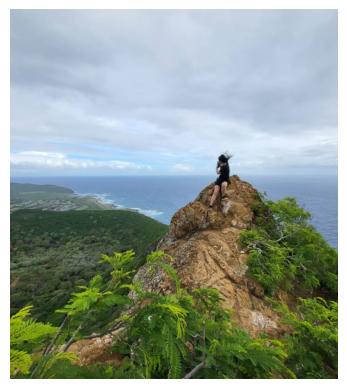

In [3]:
plt.imshow(img)
plt.axis('off')
plt.show

# Problema 1:

In [4]:
def cambiar_color(img, color):
    img_salida = np.zeros_like(img)
    alto = img.shape[0]
    ancho = img.shape[1]

    for i in range (0, alto):
        for j in range (0, ancho):
            pixel = img[i, j]

            blue = pixel [2]
            green = pixel [1]
            red = pixel[0]

            if color == 1:
                img_salida[i, j] = [0, 0, blue]  # Solo azul
            elif color == 2:
                img_salida[i, j] = [0, green, 0]  # Solo verde
            elif color == 3:
                img_salida[i, j] = [red, 0, 0]  # Solo rojo
            elif color == 10:
                img_salida[i, j] = [red, green, 0]  # Rojo y verde
            elif color == 20:
                img_salida[i, j] = [0, green, blue]  # Verde y azul
            elif color == 30:
                img_salida[i, j] = [red, 0, blue]  # Azul y rojo

    return img_salida

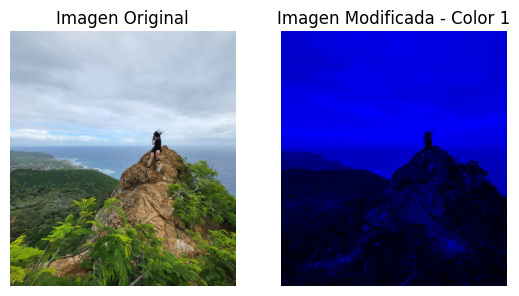

In [5]:
# Inicializar el valor de color
color = 1

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.axis('off')
plt.imshow(img)

img_modificada = cambiar_color(img, color)
plt.subplot(1, 2, 2)
plt.title(f"Imagen Modificada - Color {color}")
plt.axis('off')
plt.imshow(img_modificada)

### Problema 2

In [6]:
def crear_imagen_color(img_rojo, img_verde, img_azul):

    # Crear una imagen vacía con tres canales
    img_color = np.zeros((img_rojo.shape[0], img_rojo.shape[1], 3), dtype=np.uint8)
    alto = img_rojo.shape[0]
    ancho = img_rojo.shape[1]

    for i in range(alto):
        for j in range(ancho):
            # Asignar cada imagen de escala de grises a su respectivo canal de color
            img_color[i, j] = [img_rojo[i, j], img_verde[i, j], img_azul[i, j]]
    
    return img_color


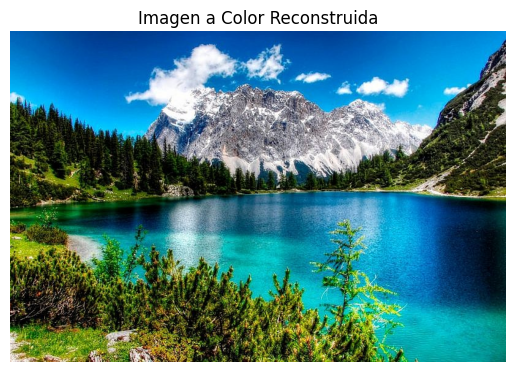

In [7]:
# Leer las imágenes en escala de grises
img_rojo = cv2.imread("imagen1_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
img_verde = cv2.imread("imagen1_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_azul = cv2.imread("imagen1_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

# Crear la imagen a color
img_color = crear_imagen_color( img_azul, img_verde, img_rojo)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Imagen a Color Reconstruida")
plt.axis('off')
plt.show()

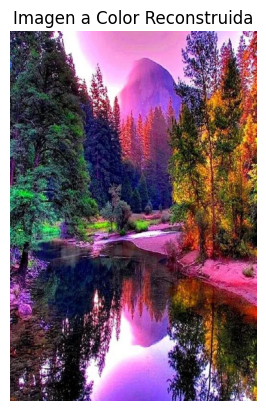

In [8]:
# Leer las imágenes en escala de grises
img_rojo = cv2.imread("imagen2_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
img_verde = cv2.imread("imagen2_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_azul = cv2.imread("imagen2_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

# Crear la imagen a color
img_color = crear_imagen_color(img_azul, img_verde, img_rojo)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Imagen a Color Reconstruida")
plt.axis('off')
plt.show()

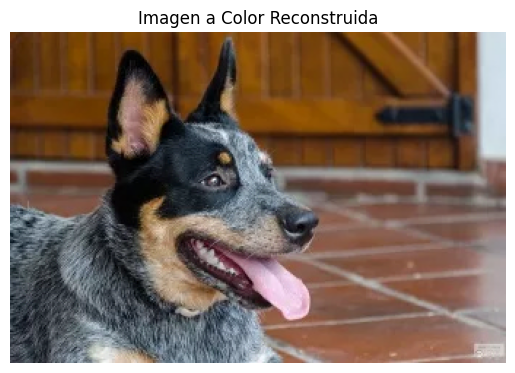

In [9]:
# Leer las imágenes en escala de grises
img_rojo = cv2.imread("perro_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
img_verde = cv2.imread("perro_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_azul = cv2.imread("perro_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

# Crear la imagen a color
img_color = crear_imagen_color( img_azul, img_verde, img_rojo)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Imagen a Color Reconstruida")
plt.axis('off')
plt.show()

# Problema 3:

In [10]:
def crear_imagenes_gray_por_canal(imagen_color):

    # Separar los canales de la imagen
    imagen_azul, imagen_verde, imagen_rojo = cv2.split(imagen_color)
    alto = imagen_color.shape[0]
    ancho = imagen_color.shape[1]

    img_gray_rojo = np.zeros((alto, ancho), dtype=np.uint8)
    img_gray_verde = np.zeros((alto, ancho), dtype=np.uint8)
    img_gray_azul = np.zeros((alto, ancho), dtype=np.uint8)

    for i in range(alto):
        for j in range(ancho):
            # Obtener el valor del píxel en cada canal
            pixel_rojo = imagen_rojo[i, j]
            pixel_verde = imagen_verde[i, j]
            pixel_azul = imagen_azul[i, j]

            # Asignar el valor del píxel a la imagen de escala de grises correspondiente
            img_gray_rojo[i, j] = pixel_rojo
            img_gray_verde[i, j] = pixel_verde
            img_gray_azul[i, j] = pixel_azul

    return img_gray_rojo, img_gray_verde, img_gray_azul



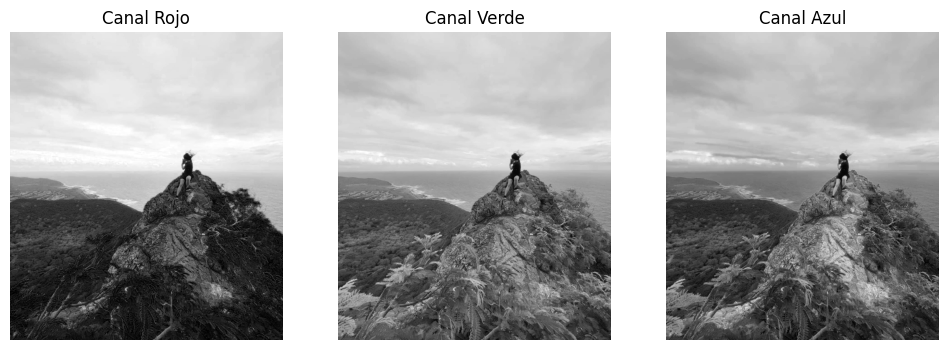

In [11]:
img_gray_rojo, img_gray_verde, img_gray_azul = crear_imagenes_gray_por_canal(img)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_gray_rojo, cmap='gray')
plt.title("Canal Rojo")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gray_verde, cmap='gray')
plt.title("Canal Verde")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gray_azul, cmap='gray')
plt.title("Canal Azul")
plt.axis('off')

plt.show()


# PROBLEMA 4

In [12]:
def mostrar_histogramas(imagen_color):
    # Separar los canales de la imagen
    imagen_azul, imagen_verde, imagen_rojo = cv2.split(imagen_color)
    
    # Convertir a escala de grises (promedio aritmético)
    imagen_gris = (imagen_azul.astype(float) + imagen_verde.astype(float) + imagen_rojo.astype(float)) / 3
    imagen_gris = imagen_gris.astype(np.uint8)
    
    # Calcular histogramas
    hist_azul, bins_azul= np.histogram(imagen_azul, bins=256,range=[0, 256])
    hist_verde, bins_verde = np.histogram(imagen_verde, bins=256, range=[0, 256])
    hist_rojo, bins_rojo = np.histogram(imagen_rojo, bins=256, range=[0, 256])
    hist_gris, bins_gris = np.histogram(imagen_gris, bins=256, range=[0, 256])
    
    # Calcular medias
    media_azul = np.mean(imagen_azul)
    media_verde = np.mean(imagen_verde)
    media_rojo = np.mean(imagen_rojo)
    media_gris = np.mean(imagen_gris)
    
    # Crear subplots para los histogramas
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.ravel()
    
    # Histograma del canal azul
    axs[0].plot(bins_azul [:-1],hist_azul, color='blue')
    axs[0].axvline(media_azul, color='blue', linestyle='--')
    axs[0].set_title('Histograma Color Azul')

    
    # Histograma del canal verde
    axs[1].plot(bins_verde [:-1], hist_verde, color='green')
    axs[1].axvline(media_verde, color='green', linestyle='--')
    axs[1].set_title('Histograma Color Verde')
    
    # Histograma del canal rojo
    axs[2].plot(bins_rojo[:-1], hist_rojo, color='red')
    axs[2].axvline(media_rojo, color='red', linestyle='--')
    axs[2].set_title('Histograma Color Rojo')
    
    # Histograma de la imagen en escala de grises
    axs[3].plot(bins_gris[:-1], hist_gris, color='gray')
    axs[3].axvline(media_gris, color='gray', linestyle='--')
    axs[3].set_title('Histograma Escala de Grises')

    plt.show()

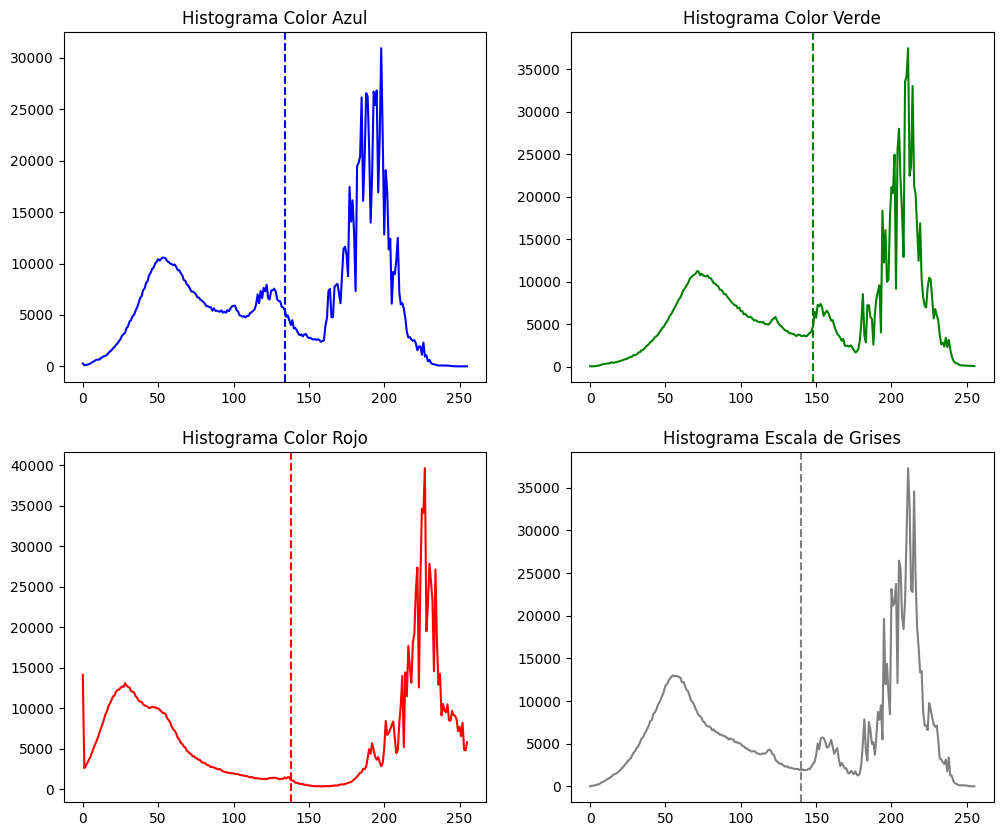

In [13]:
# Ejemplo de uso
mostrar_histogramas(img)

# PROBLEMA 5

# Enfoque de Escala de Grises Ponderado

## Introducción
El enfoque de escala de grises ponderado es una técnica ampliamente utilizada en procesamiento de imágenes para convertir una imagen en color (RGB) a una imagen en escala de grises. A diferencia de métodos simples como el promedio de los canales de color, este enfoque toma en cuenta cómo el ojo humano percibe la luminosidad de diferentes colores, aplicando distintos "pesos" a los canales de color (rojo, verde, azul) para obtener una representación en escala de grises más precisa y visualmente coherente.

## Concepto Básico
En una imagen en color, cada píxel se compone de tres valores que corresponden a la intensidad de los canales de color rojo (R), verde (G) y azul (B). La conversión a escala de grises implica transformar estos tres valores en uno solo, que representa la luminosidad percibida del píxel.

La escala de grises ponderada se basa en la observación de que los seres humanos perciben los colores con diferentes niveles de sensibilidad. Por ejemplo, somos más sensibles a la luz verde que a la azul o roja.

## Fórmula de Conversión
La fórmula estándar para convertir un píxel RGB a escala de grises ponderada es la siguiente:

\[
\text{Grayscale} = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B
\]

Donde:
- **R** es la intensidad del canal rojo.
- **G** es la intensidad del canal verde.
- **B** es la intensidad del canal azul.

## Explicación de los Coeficientes

- **Verde (G)**: El canal verde recibe el mayor peso (0.5870) porque el ojo humano es más sensible a la luz verde. Este peso refleja la importancia de la contribución del verde en la percepción general de luminosidad.
  
- **Rojo (R)**: El canal rojo tiene un peso intermedio (0.2989). Aunque el rojo es un color dominante, no afecta tanto la percepción de luminosidad como el verde.

- **Azul (B)**: El canal azul tiene el menor peso (0.1140). El ojo humano es menos sensible al azul, por lo que su contribución a la luminosidad percibida es menor.

## Comparación con Otros Métodos
- **Promedio Simple**: Una técnica simple de conversión a escala de grises es promediar los valores de los tres canales:

  Grayscale = R + G + B / 3

  Aunque es más sencilla, esta técnica no refleja adecuadamente la percepción humana de la luminosidad y puede resultar en imágenes en escala de grises que no se ven naturales.

- **Desaturación**: Otro método es utilizar el valor máximo y mínimo de los canales para calcular el gris:


  Grayscale = max(R,G,B) + min(R,G,B) / 2


  Este método también puede producir resultados que no coinciden con la percepción natural de la luminosidad.

## Aplicaciones
El enfoque de escala de grises ponderado es comúnmente utilizado en varias aplicaciones, incluyendo:

- **Procesamiento de Imágenes**: Mejora la calidad de imágenes en escala de grises en aplicaciones como fotografía digital, gráficos por computadora, y video.
- **Visión por Computadora**: Utilizado en algoritmos que requieren la reducción de complejidad en imágenes mientras mantienen la información visual clave.
- **Impresión**: Las imágenes en color convertidas a escala de grises para impresión requieren esta técnica para asegurar una buena representación de la luminosidad.

In [14]:
def convertir_a_grises_ponderado(imagen):
    # Coeficientes de ponderación para cada canal
    coeficientes = np.array([0.2989, 0.5870, 0.1140], dtype=np.float32)
    
    # Calcular la imagen en escala de grises ponderada
    imagen_grises = np.dot(imagen[..., :3], coeficientes)
    
    # Convertir el array a tipo uint8
    imagen_grises = np.clip(imagen_grises, 0, 255).astype(np.uint8)
    
    return imagen_grises

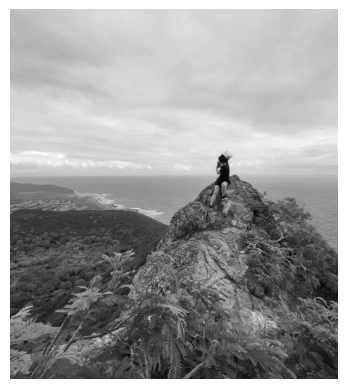

In [15]:
# Convertir a escala de grises
imagen_grises = convertir_a_grises_ponderado(img)

# Mostrar la imagen en escala de grises usando matplotlib
plt.imshow(imagen_grises, cmap='gray')
plt.axis('off')  # Opcional: ocultar los ejes
plt.show()

# PROBLEMA 6

## Espacio de Color HSV

### Introducción

El espacio de color **HSV** (Hue, Saturation, Value) es un modelo de color que representa los colores en términos de tres componentes:
- **Hue (Tono)**: Representa el color real y se mide en grados de 0 a 360. Los valores de tono corresponden a colores específicos, como rojo, verde, azul, etc.
- **Saturation (Saturación)**: Representa la intensidad del color. Un valor de saturación del 0% significa que el color es gris (sin saturación), mientras que un valor del 100% indica un color completamente saturado.
- **Value (Valor)**: Representa el brillo del color. Un valor de 0% indica negro (sin brillo), mientras que un valor del 100% indica el color completo con la máxima luminosidad.

## Mapeo de Colores al Espacio HSV

Para mapear un color al espacio HSV, se siguen estos pasos:
1. **Hue (Tono)**: Se determina el tono del color en función del ángulo de la rueda de colores.
2. **Saturation (Saturación)**: Se mide la intensidad del color, es decir, qué tan puro es el color.
3. **Value (Valor)**: Se mide el brillo del color.

Estos valores se pueden mapear desde el espacio RGB (Rojo, Verde, Azul) al espacio HSV utilizando transformaciones matemáticas específicas.

## Ejemplo en Python

A continuación, se muestra cómo convertir una imagen a espacio HSV utilizando la biblioteca `Pillow` en Python:

```python
from PIL import Image

def convert_to_hsv(image_path, output_path):
    # Abrir la imagen
    img = Image.open(image_path)
    
    # Convertir la imagen a modo HSV
    hsv_img = img.convert('HSV')
    
    # Guardar la imagen en el espacio de color HSV
    hsv_img.save(output_path)

# Ruta de la imagen original y de salida
input_image_path = 'path/to/img.jpg'
output_image_path = 'path/to/img_hsv.jpg'

# Convertir la imagen a HSV
convert_to_hsv(input_image_path, output_image_path)
